In [9]:
import pandas as pd
import networkx as nx
import numpy as np

df = pd.read_excel("data/AGV_1.xlsx").fillna(-1)
df.columns = [i for i in range(123)]  # 重命名横坐标
# df.index = [i for i in range(1, 123)]
G = nx.Graph()  # 创建无向图
df

,0,1,2,3,4,5,6,7,8,9,...,113,114,115,116,117,118,119,120,121,122
0,站点1,-1.0,8.4,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,站点2,8.4,-1.0,4.5,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,站点3,-1.0,4.5,-1.0,5.3,-1.0,1.6,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,站点4,-1.0,-1.0,5.3,-1.0,5.1,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,站点5,-1.0,-1.0,-1.0,5.1,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,站点118,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,9.1,-1.0,-1.0,-1.0,-1.0,-1.0
118,站点119,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,8.6,-1.0,-1.0,5.0,-1.0,-1.0
119,站点120,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,-1.0,-1.0,-1.0
120,站点121,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,7.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.1


In [10]:
# 获取有效数据
for i, row in df.iterrows():
    l_tmp = []
    f = i + 1
    for idx, val in row.items():
        if val != float(-1) and type(val) != type('站点1'):
            if G.get_edge_data(f, idx):  # 去重
                continue
            l_tmp.append((f, idx, val))
            G.add_weighted_edges_from(l_tmp)
    print(l_tmp)

[(1, 2, 8.4)]
[(2, 3, 4.5)]
[(3, 4, 5.3), (3, 6, 1.6)]
[(4, 5, 5.1)]
[]
[(6, 7, 2.4)]
[(7, 8, 8.0)]
[(8, 9, 4.8)]
[(9, 10, 8.7), (9, 11, 4.1), (9, 14, 7.0)]
[]
[(11, 12, 6.8), (11, 13, 3.9)]
[]
[]
[(14, 15, 2.9), (14, 17, 1.7)]
[(15, 16, 6.3)]
[]
[(17, 18, 3.2), (17, 21, 9.1), (17, 25, 1.5)]
[(18, 19, 5.2), (18, 20, 9.7)]
[]
[]
[(21, 22, 5.4), (21, 23, 8.1)]
[]
[(23, 24, 3.3)]
[]
[(25, 26, 5.2), (25, 27, 7.5), (25, 30, 7.4)]
[]
[(27, 28, 8.1), (27, 29, 3.5)]
[]
[]
[(30, 31, 7.9), (30, 35, 6.2)]
[(31, 32, 4.6), (31, 33, 6.5)]
[]
[(33, 34, 8.9)]
[]
[(35, 36, 7.5), (35, 39, 8.5), (35, 43, 3.9)]
[(36, 37, 5.0), (36, 38, 2.3)]
[]
[]
[(39, 40, 8.6), (39, 41, 8.7)]
[]
[(41, 42, 9.8)]
[]
[(43, 44, 8.3)]
[(44, 45, 9.2)]
[(45, 46, 6.6)]
[(46, 47, 9.2)]
[(47, 48, 8.0), (47, 52, 4.1)]
[(48, 49, 1.0), (48, 50, 2.2)]
[]
[(50, 51, 2.7)]
[]
[(52, 53, 6.2), (52, 54, 3.7), (52, 57, 4.1)]
[]
[(54, 55, 2.5), (54, 56, 2.6)]
[]
[]
[(57, 58, 2.5), (57, 62, 6.3)]
[(58, 59, 5.4), (58, 60, 3.2)]
[]
[(60, 61, 2.

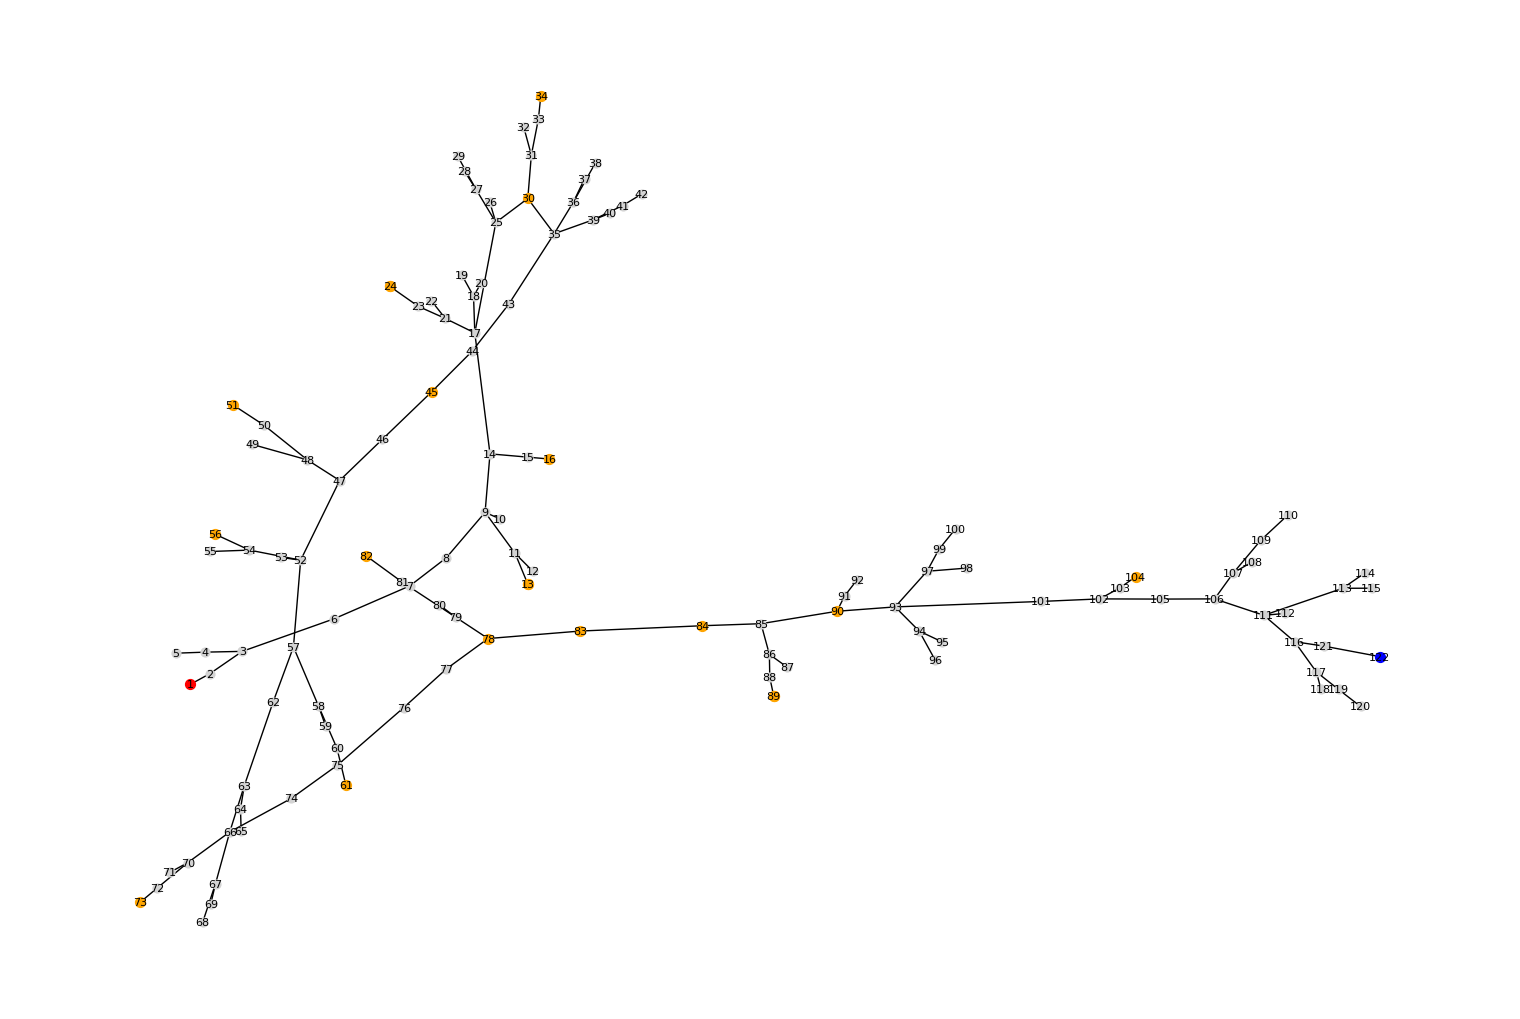

In [11]:
import matplotlib.pyplot as plt
pos = nx.spring_layout(G, iterations=500)  # 力导向布局算法，可以有效减少边的交叉, 可适当增加 iterations 的次数

plt.figure(figsize=(15, 10))

nx.draw(G, pos, node_size=40, with_labels=True, font_size=8, node_color='lightgrey')

# 标记指定节点
nx.draw_networkx_nodes(G, pos, {1: "s"}, node_size=50, node_color='red')
nx.draw_networkx_nodes(G, pos, {122: "e"}, node_size=50, node_color='blue')

df = pd.read_excel("data/AGV_1.xlsx", sheet_name="无人车数据")
df.columns = [i for i in range(43)]

start_point = [-1]
for i, row in df.iterrows():
    start_point.append(row[3])
    nx.draw_networkx_nodes(G, pos, [row[3]], node_size=50, node_color='orange')

plt.show()

In [12]:
df = pd.read_excel("data/AGV_1.xlsx", sheet_name="无人车数据")
df.columns = [i for i in range(43)]

car = [0]
for i, row in df.iterrows():
    car.append(row[2])

In [13]:
import numpy as np
INF = 0x3f3f3f3f
df = pd.read_excel("data/AGV_1.xlsx").fillna(-1)
df.columns = [i for i in range(123)]
df.index = [i for i in range(1, 123)]

In [14]:
d = np.zeros((123, 123))
for i in range(123):
    for j in range(123):
        if i != j:
            d[i][j] = INF

for i, row in df.iterrows():
    for j in range(1, 123):
        if row[j] != float(-1):
            d[i][j] = row[j]

for k in range(1, 123):
    for i in range(1, 123):
        for j in range(1, 123):
            d[i][j] = min(d[i][j], d[i][k] + d[k][j])

In [15]:
print((d[10][16] + 2 * d[1][10]) * car[1] + (d[10][13] + 2 * d[10][30]) * car[3]
 + d[30][45] * car[7] + (d[56][57] + d[57][78]) * car[13] + d[78][84] * car[15]
 + d[84][90] * car[16] + d[90][102] * car[20] + (d[102][104] + d[102][122]) * car[19])

17.1857
